## Importando librerias

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm 
import pandas as pd 
from sklearn.model_selection import train_test_split


%matplotlib notebook 
#adaw
#eqwe


In [2]:
# ============= Part 1: Visualizando los datos =============
df = pd.read_csv("./StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Visualizando datos

In [3]:
m = 1000
X = np.array(df.iloc[:,6])
X = X.reshape(m,1)
y = np.array(df.iloc[:,7])
y = y.reshape(m,1)
#Agrea  una fila de unos a X 
XX= X.T 
ones = np.ones((1,m)) 
X_plus_one = np.concatenate((ones,XX)) 
XA = X_plus_one.transpose()

<IPython.core.display.Javascript object>


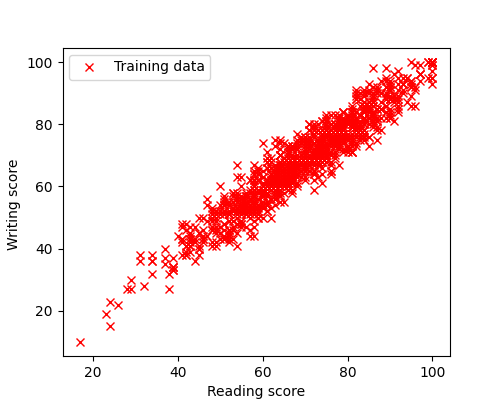

In [14]:
fig1 = plt.figure(figsize=(5,4),dpi=100)
plt.plot(  X,y ,'rx',label="Training data" )
plt.xlabel("Reading score")
plt.ylabel('Writing score ')
plt.legend()

## Funciones a utilizar 

In [34]:
def plot_gradient():
    fig2 = plt.figure(figsize=(6,8))
    ax3d = plt.axes(projection="3d")

    theta0_vals = np.linspace(-10, 10, 100)
    theta1_vals = np.linspace(-10, 10, 100)

    # Inicializa  J_vals 
    J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

    # Calcular los valores para J_vals
    for i in range(len(theta0_vals)):
        for j in range(len(theta1_vals)):
            t = np.array([ [theta0_vals[i]], [theta1_vals[j]]])        
            J_vals[i,j] = computeCost(X_norm, y_norm, t)
     
    
    J_vals = np.transpose(J_vals)
    theta0_vals,theta1_vals = np.meshgrid(theta0_vals,theta1_vals)


    surf = ax3d.plot_surface(theta0_vals, theta1_vals, J_vals,cmap=cm.cool)
    
    ax3d.set_title('Cost Function J(0)')
    ax3d.set_xlabel('$0_{0}$')
    ax3d.set_ylabel('$0_{1}$')
    ax3d.set_zlabel('$J(0)$')
    

In [35]:
def plot_contour(p0,p1):  
    fig3 = plt.figure(figsize=(10,6))

    theta0_vals = np.linspace(-10, 10, 100)
    theta1_vals = np.linspace(-10, 10, 100)
    # initialize J_vals to a matrix of 0's
    J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

    # Fill out J_vals
    for i in range(len(theta0_vals)):
        for j in range(len(theta1_vals)):
            t = np.array([ [theta0_vals[i]], [theta1_vals[j]]])        
            J_vals[i,j] = computeCost(X_norm, y_norm, t)
        
    
    J_vals = np.transpose(J_vals)
    
    
    plt.subplot(121)
    plt.plot (p0,p1,"o",c="k" )
    plt.contour(theta0_vals,theta1_vals,J_vals, np.logspace(-2, 3, 20),colors = "b")

    plt.ylabel('$0_{1}$')
    plt.xlabel('$0_{0}$')
    
    

In [7]:
# Scale features and set them to zero mean
def featureNormalize(X):
    X_norm = X
    mu = np.zeros( (1, np.size(X, 1)) ) # tamaño 1x2
    sigma = np.zeros((1, np.size(X, 1) )) # tamaño 1x2
    m = len(X)
    
    mu = np.mean(X,axis=0)
    sigma = np.sum((X - mu)**2,axis=0 )/(m-1)
    sigma = np.sqrt(sigma)

    X_norm = (X - mu )/ sigma;
    return X_norm

In [8]:
def computeCost(X,y,theta):
    m = len(y)
    J = 0
    
    H = X.dot(theta)
    J = np.square(H - y)
    J = np.sum(J)/(2*m)
    return J    

In [31]:
def gradientDesccent(X,y,alpha,num_iters):
    m =len(y)
    J_history  = np.zeros((num_iters,1))
    # Genera un punto random
    theta = np.random.rand(2)* 20 - 10
    theta = theta.reshape(2,1)
    plot_contour(theta[0],theta[1])
    
    for ite in range(num_iters):
        theta = theta  - (alpha/m)* np.transpose(X).dot(X.dot(theta)-y) 
        J_history[ite] = computeCost(X,y,theta)
        #print(J_history)
        
        # Imprime los pasos del descenso del gradiente
        if ite % 50 == 0 and ite >1 :
           
            plt.plot(theta[0],theta[1]  ,'rx')

        
    return (J_history,theta)

## Entrenando el modelo

In [10]:
# Normalizar los datos
X_norm = featureNormalize(X)
y_norm = featureNormalize(y)

#Agregamos una fila de unos de 1xm a la matriz X_norm
X_norm = X_norm.T
ones = np.ones((1,m)) 
X_plus_one = np.concatenate((ones,X_norm))
X_norm = X_plus_one.transpose()

# Divide los datos en entrenamiento y prueba
X_train, X_test , y_train , y_test =train_test_split(X_norm,y_norm,test_size=0.2)

<IPython.core.display.Javascript object>


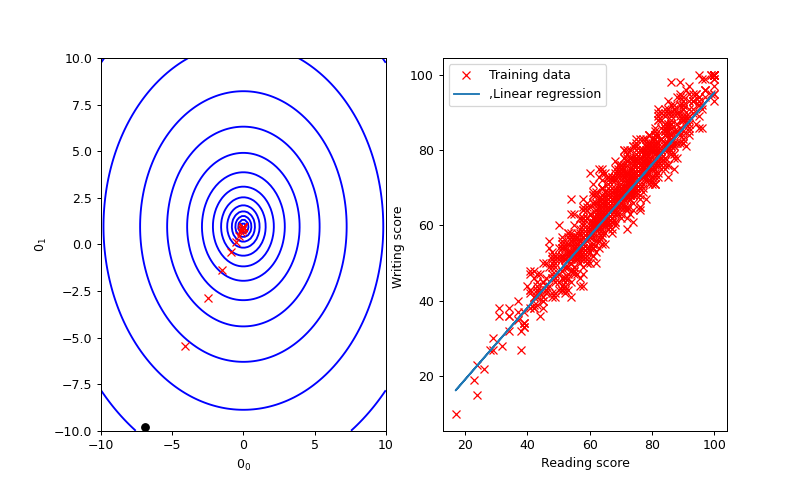

In [37]:
# Configuraciones del descenso del gradiente
#theta_inicial = np.array([10,0]).reshape(2,1)
iterations = 1000
alpha = 0.01
# Obtenemos los parametros theta y el historial de la funcion de coste
J_history,theta = gradientDesccent(X_train,y_train,alpha,iterations)

#Plot the linear fit    
plt.subplot(122)
plt.plot(  X,y ,'rx',label="Training data" )
plt.plot(XA[:,1] ,XA.dot(theta),label=",Linear regression" )  
plt.xlabel("Reading score")
plt.ylabel('Writing score ')
plt.legend()